In [9]:
import pandas as pd
import pyextremes 
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import distance
import math
import os
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/calVal01.csv")
ped=[15514]
df=df[df['Track ID']==ped[0]]

# df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/ped01.csv")
df.head(10)


,Unnamed: 0,Track ID,TimeStamp,Type,X,Y,dx,dy,vx,vy,dvx,dvy,ax,ay,avg_ax,avg_ay
7093,1232208,15514,5295.04,Pedestrian,778895.83,1435731.57,0.01,0.00,0.0625,0.0000,-6.250000e-02,0.0000,-3.906250e-01,0.000000,1.634747,0.406544
7094,1232209,15514,5295.20,Pedestrian,778895.84,1435731.57,0.00,0.00,0.0000,0.0000,-1.250000e-01,-0.0625,-7.812500e-01,-0.390625,1.634747,0.406544
7095,1232210,15514,5295.36,Pedestrian,778895.84,1435731.57,-0.02,-0.01,-0.1250,-0.0625,7.275958e-10,0.0000,4.547474e-09,0.000000,1.634747,0.406544
7096,1232211,15514,5295.52,Pedestrian,778895.82,1435731.56,-0.02,-0.01,-0.1250,-0.0625,6.250000e-02,0.0000,3.906250e-01,0.000000,1.634747,0.406544
7097,1232212,15514,5295.68,Pedestrian,778895.80,1435731.55,-0.01,-0.01,-0.0625,-0.0625,0.000000e+00,0.0625,0.000000e+00,0.390625,1.634747,0.406544
7098,1232213,15514,5295.84,Pedestrian,778895.79,1435731.54,-0.01,0.00,-0.0625,0.0000,1.250000e-01,0.0000,7.812500e-01,0.000000,1.634747,0.406544
7099,1232214,15514,5296.00,Pedestrian,778895.78,1435731.54,0.01,0.00,0.0625,0.0000,-6.250000e-02,0.0000,-3.906250e-01,0.000000,1.634747,0.406544
7100,1232215,15514,5296.16,Pedestrian,778895.79,1435731.54,0.00,0.00,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,0.000000,1.634747,0.406544
7101,1232216,15514,5296.32,Pedestrian,778895.79,1435731.54,0.00,0.00,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,0.000000,1.634747,0.406544
7102,1232217,15514,5296.48,Pedestrian,778895.79,1435731.54,0.00,0.00,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,0.000000,1.634747,0.406544


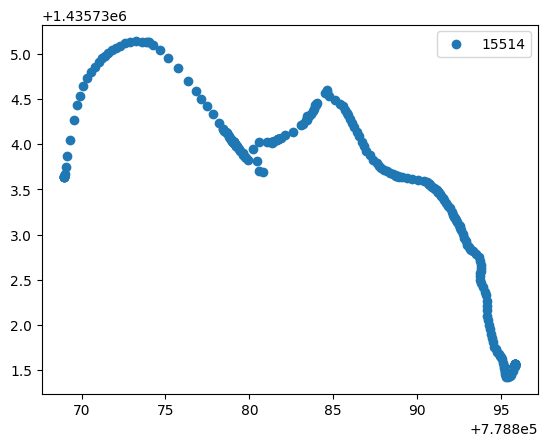

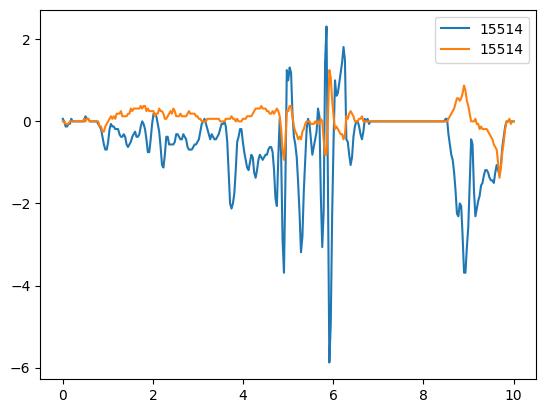

In [10]:
# ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
for id in ped:
    z=df[df['Track ID']==id]['ax'].count()
    x=np.linspace(0,10,z)
    plt.scatter(df[df['Track ID']==id]['X'],df[df['Track ID']==id]['Y'],label=id)
    plt.legend()
    # plt.ylim(-15,15)
plt.show()
for id in ped:
    z=df[df['Track ID']==id]['ax'].count()
    x=np.linspace(0,10,z)
    plt.plot(x,df[df['Track ID']==id]['vx'],label=id)
    plt.plot(x,df[df['Track ID']==id]['vy'],label=id)
    plt.legend()
plt.show()



In [197]:
error= df[
    (df['Track ID']==ped[0])&
    ((df['dx']**2 + df['dy']**2) > 2**2)
]['TimeStamp']
total= df[
    (df['Track ID']==ped[0])
]['TimeStamp']
len(total)-len(error)


0

In [198]:
df= df[~((df['Track ID'] == ped[0]) & (df['TimeStamp'].isin(error)))]
error= df[
    (df['Track ID']==ped[0])&
    ((df['dx']**2 + df['dy']**2) > 2**2)
]['TimeStamp']
error


Series([], Name: TimeStamp, dtype: float64)

In [199]:
# df.head(100)
Dx=[]
Dy=[]
prev_dx = 0  
prev_dy = 0
i=0
while i<len(df):
    
    if ((i-1)<0):
        dx=0
        dy=0
    else: 
        dt = df['TimeStamp'].iloc[i] - df['TimeStamp'].iloc[i-1]
        if dt > 0.16 or df['Track ID'].iloc[i] != df['Track ID'].iloc[i-1]:
            # Large time gap or different track - carry forward previous values
            dx = prev_dx
            dy = prev_dy
        else:
            if dt == 0:
                dt = 0.16  # Prevent division by zero
            dx = df['X'].iloc[i] - df['X'].iloc[i-1]
            dy = df['Y'].iloc[i] - df['Y'].iloc[i-1]
            # Update previous values
            prev_dx = dx
            prev_dy = dy

    Dx.append(dx)
    Dy.append(dy)
    i+=1

df['dx']=Dx
df['dy']=Dy
df['dx']=df['dx'].fillna(0)
df['dy']=df['dy'].fillna(0)
df['vx']=df['dx']/0.16
df['vy']=df['dy']/0.16
Dvx=[]
Dvy=[]
prev_dvx=0
prev_dvy=0
i=0
while i<len(df):
    if ((i-1)<0):
        dvx=0
        dvy=0
    else: 
        dt = df['TimeStamp'].iloc[i] - df['TimeStamp'].iloc[i-1]
        if dt > 0.16 or df['Track ID'].iloc[i] != df['Track ID'].iloc[i-1]:
            # Large time gap or different track - carry forward previous values
            dvx = prev_dvx
            dvy = prev_dvy
        else:
            if dt == 0:
                dt = 0.16  # Prevent division by zero
            dvx = df['vx'].iloc[i] - df['vx'].iloc[i-1]
            dvy = df['vy'].iloc[i] - df['vy'].iloc[i-1]
            # Update previous values
            prev_dx = dvx
            prev_dy = dvy

    Dvx.append(dvx)
    Dvy.append(dvy)
    i+=1

df['dvx']=Dvx
df['dvy']=Dvy
df['dvx']=df['dvx'].fillna(0)
df['dvy']=df['dvy'].fillna(0)
df['ax']=df['dvx']/0.16
df['ay']=df['dvy']/0.16
df['avg_ax'] = df.groupby('Track ID')['ax'].transform(lambda x: x.abs().mean())
df['avg_ay'] = df.groupby('Track ID')['ay'].transform(lambda x: x.abs().mean())
df['avg_ay'] = df['avg_ay'].fillna(0)
df['avg_ax'] = df['avg_ax'].fillna(0)
# df.head(100)

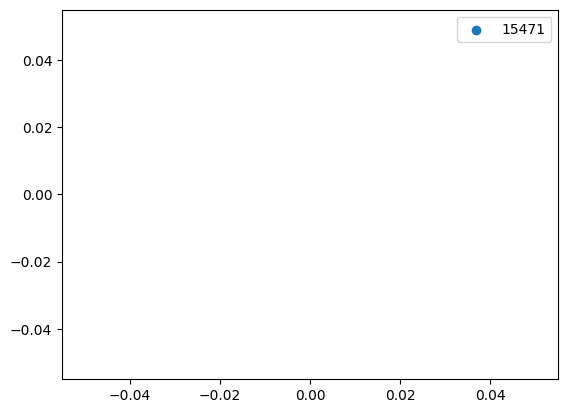

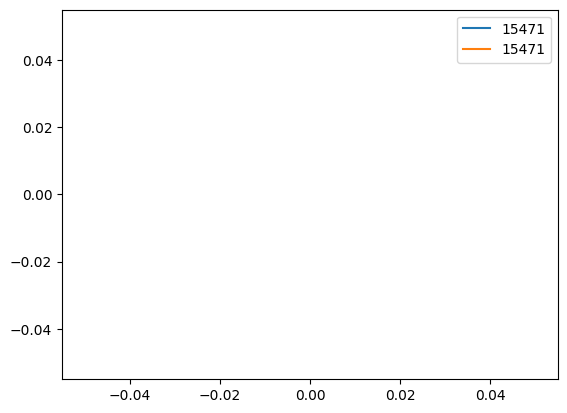

In [200]:
for id in ped:
    z=df[df['Track ID']==id]['ax'].count()
    x=np.linspace(0,10,z)
    plt.scatter(df[df['Track ID']==id]['X'],df[df['Track ID']==id]['Y'],label=id)
    plt.legend()

plt.show()
for id in ped:
    # z=df[df['Track ID']==id]['ax'].count()
    x=df[df['Track ID']==id]['TimeStamp']
    plt.plot(x,df[df['Track ID']==id]['ax'],label=id)
    plt.plot(x,df[df['Track ID']==id]['ay'],label=id)
    plt.legend()
plt.show()


In [201]:
df[df['ax']>]


SyntaxError: invalid syntax (2042019097.py, line 1)

In [ ]:
# df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/pedRes01.csv")


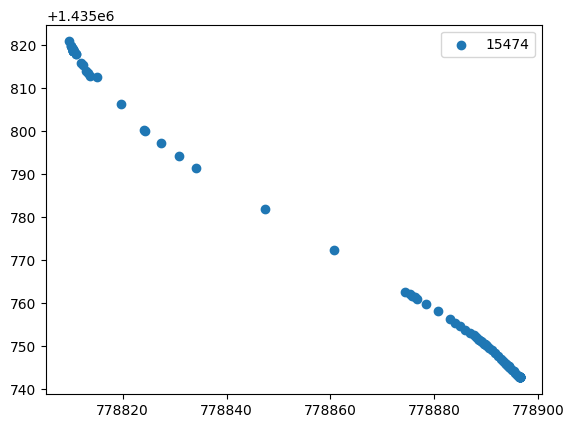

In [ ]:

for id in ped:
    z=df[df['Track ID']==id]['ax'].count()
    x=np.linspace(0,10,z)
    plt.scatter(df[df['Track ID']==id]['X'],df[df['Track ID']==id]['Y'],label=id)
    plt.legend()

plt.show()

In [11]:
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
ped=[15514]
df=df[df['Track ID']==ped[0]]
df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/ped01_Raw.csv")
df.head(10)

,Track ID,Type,X,Y,Speed,TangX,TangaX,TimeStamp
1232208,15514.0,Pedestrian,778895.83,1435731.57,0.1942,0.3084,0.0254,5295.04
1232209,15514.0,Pedestrian,778895.84,1435731.57,0.2754,0.2192,0.0175,5295.20
1232210,15514.0,Pedestrian,778895.84,1435731.57,0.2891,0.0832,0.0153,5295.36
1232211,15514.0,Pedestrian,778895.82,1435731.56,0.2565,0.0009,0.0132,5295.52
1232212,15514.0,Pedestrian,778895.80,1435731.55,0.2436,0.0117,0.0135,5295.68
1232213,15514.0,Pedestrian,778895.79,1435731.54,0.2411,-0.0447,0.0031,5295.84
1232214,15514.0,Pedestrian,778895.78,1435731.54,0.2122,-0.1114,0.0034,5296.00
1232215,15514.0,Pedestrian,778895.79,1435731.54,0.1404,-0.1651,0.0082,5296.16
1232216,15514.0,Pedestrian,778895.79,1435731.54,0.0622,-0.1298,0.0072,5296.32
1232217,15514.0,Pedestrian,778895.79,1435731.54,0.0261,-0.0015,0.0079,5296.48
